# Predicting House Prices

This dataset contains house sale prices for King County

Target: make the exploratory analysis

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 50)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Read dataset

In [4]:
df_house = pd.read_csv('../src/data/house_prices.csv', parse_dates = ['date'],
                        dtype = {'id': np.str_,
                                'price': np.float32,
                                'bedrooms': np.float32,
                                'bathrooms': np.float32,
                                'sqft_living': np.float32,
                                'sqft_lot': np.int32, 
                                'floors': np.float32,
                                'waterfront': np.float32,
                                'view': np.float32,
                                'condition': np.float32,
                                'grade': np.float32,
                                'sqft_above': np.float32,
                                'sqft_basement': np.float32,
                                'yr_built': np.float32,
                                'yr_renovated': np.float32,
                                'zipcode': np.float32,
                                'lat': np.float32,
                                'long': np.float32,
                                'sqft': np.float32,
                                'living15': np.float32,
                                'sqft_lot15': np.float32,       
                    } 
)



In [5]:
df_house.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180.00,5650,1.00,0.00,0.00,3.00,7.00,1180.00,0.00,1955.00,0.00,98178.00,47.51,-122.26,1340,5650.00
1,6414100192,2014-12-09,538000.00,3.00,2.25,2570.00,7242,2.00,0.00,0.00,3.00,7.00,2170.00,400.00,1951.00,1991.00,98125.00,47.72,-122.32,1690,7639.00


In [14]:
df_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df_house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df_house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21613.00,540085.81,367126.97,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.91,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00
grade,21613.00,7.66,1.18,1.00,7.00,7.00,8.00,13.00


# Inspect each Column

In [43]:
for val in df_house:
    print(val)
    print(df_house[val].value_counts())
    print()

id
0795000620    3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64

date
2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: date, Length: 372, dtype: int64

price
350000.00     172
450000.00     172
550000.00     159
500000.00     152
425000.00     150
             ... 
607010.00       1
1362500.00      1
298800.00       1
957500.00       1
402101.00       1
Name: price, Length: 4028, dtype: int64

bedrooms
3.00     9824
4.00     6882
2.00     2760
5.00     1601
6.00      272
1.00      199
7.00       38
0.00       13
8.00       13
9.00        6
10.00       3
11.00       1
33.00       1
Name: bedrooms, dtype: int64

bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930

In [11]:
df_house.groupby(["bedrooms"], dropna=False)["price"].count().reset_index()

,bedrooms,price
0,0.00,13
1,1.00,199
2,2.00,2760
3,3.00,9824
4,4.00,6882
5,5.00,1601
6,6.00,272
7,7.00,38
8,8.00,13
9,9.00,6


House Price Distribution

<AxesSubplot:xlabel='price', ylabel='Count'>

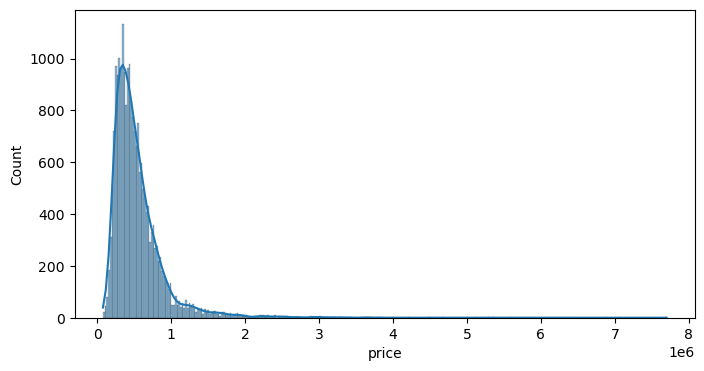

In [50]:
plt.figure(figsize = (8,4))
sns.histplot(df_house['price'],  kde=True)

Correlation 

In [79]:
corr = df_house.corr()
corr.shape

(19, 19)

<AxesSubplot:title={'left':'Correlation Matrix'}>

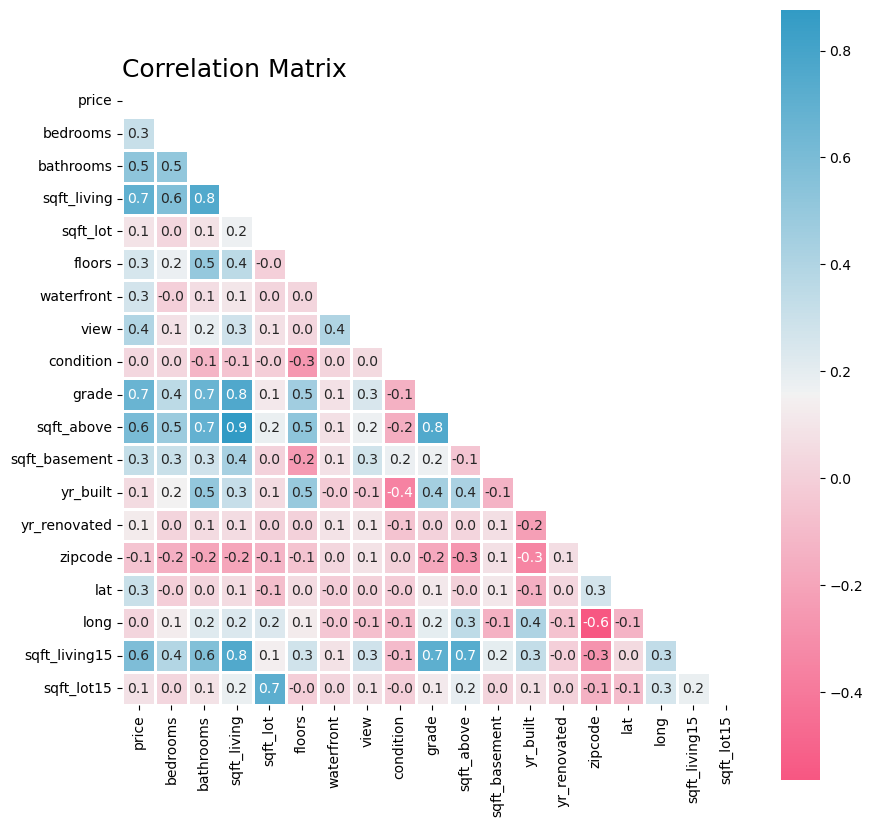

In [84]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,10))

# mask
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)


# title
title = 'Correlation Matrix'
plt.title(title, loc='left', fontsize=18)

sns.heatmap(corr, mask=mask, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap=cmap, linewidths=2 )

The Highest correlated variables are: sqft_living, bathrooms, grade, sqft_above, and sqft_living15

Living Space Distribution

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

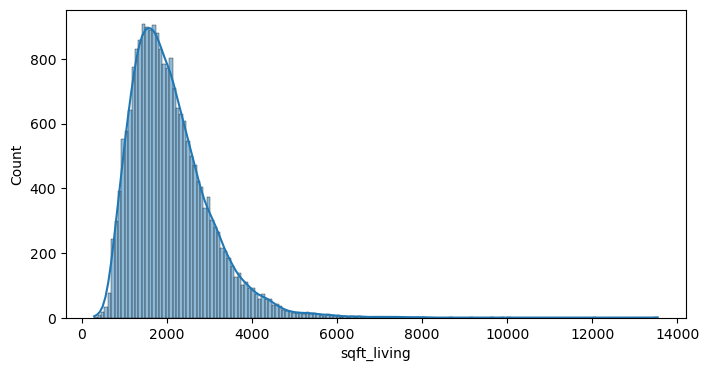

In [85]:
plt.figure(figsize = (8,4))
sns.histplot(df_house['sqft_living'],  kde=True)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

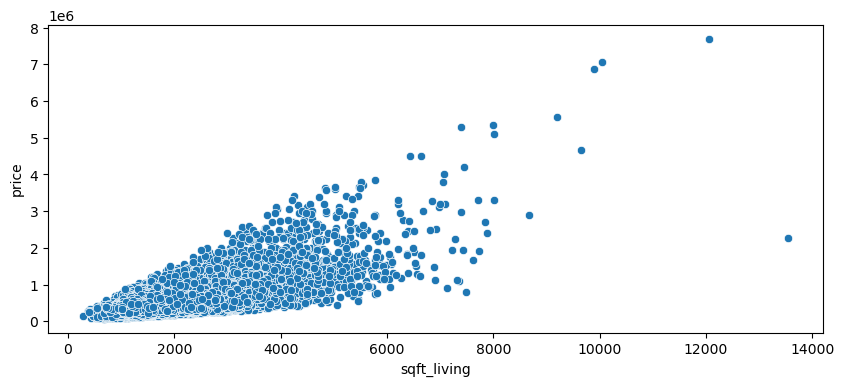

In [98]:
plt.figure(figsize = (10,4))
sns.scatterplot(x='sqft_living',y='price',data=df_house)

chart of no correlated var

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

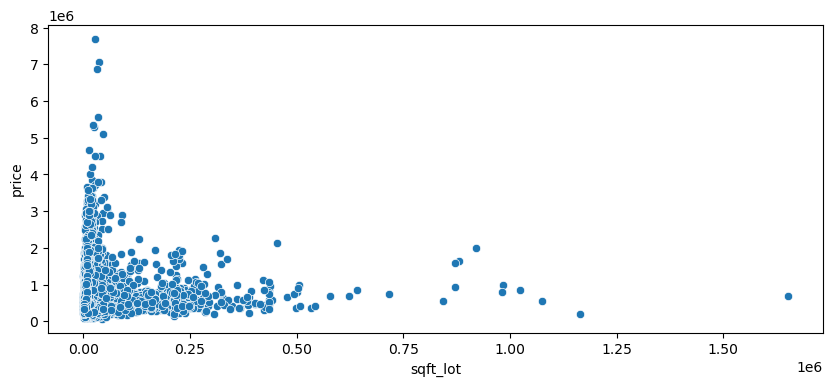

In [99]:
plt.figure(figsize = (10,4))
sns.scatterplot(x='sqft_lot',y='price',data=df_house)

bedrooms

c:\Users\marci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

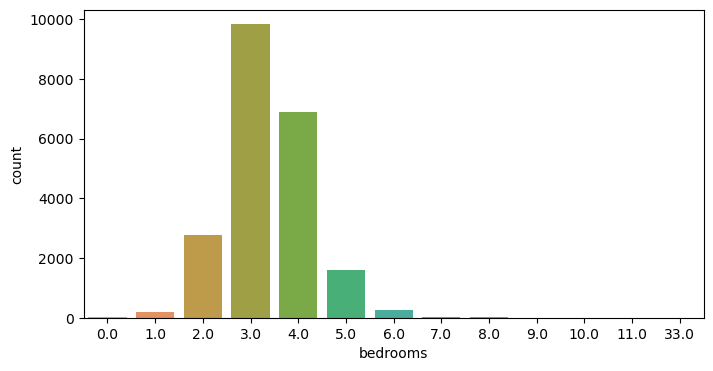

In [86]:
plt.figure(figsize = (8,4))
sns.countplot(df_house['bedrooms'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

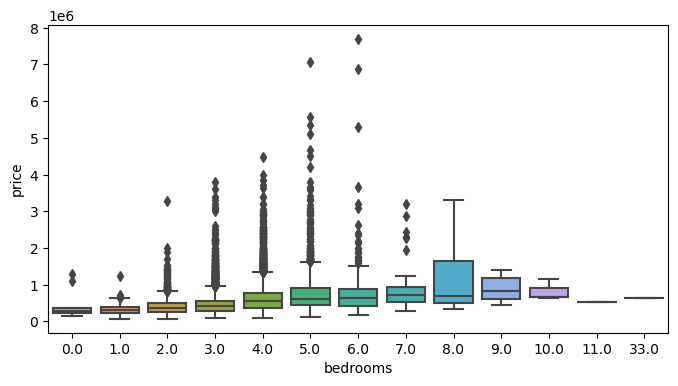

In [87]:
plt.figure(figsize = (8,4))
sns.boxplot(x='bedrooms',y='price',data=df_house)

bathrooms

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

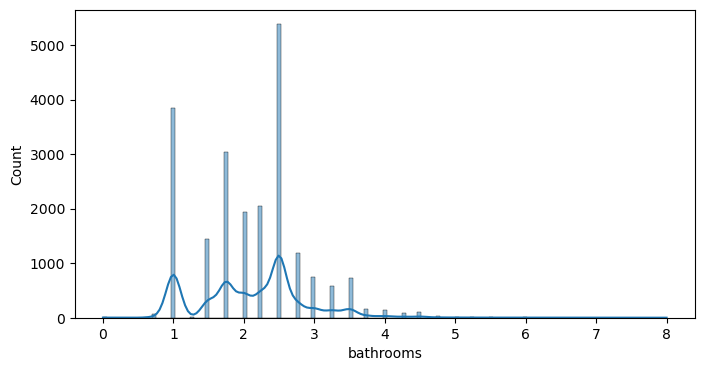

In [90]:
plt.figure(figsize = (8,4))
sns.histplot(df_house['bathrooms'],  kde=True)

Grade

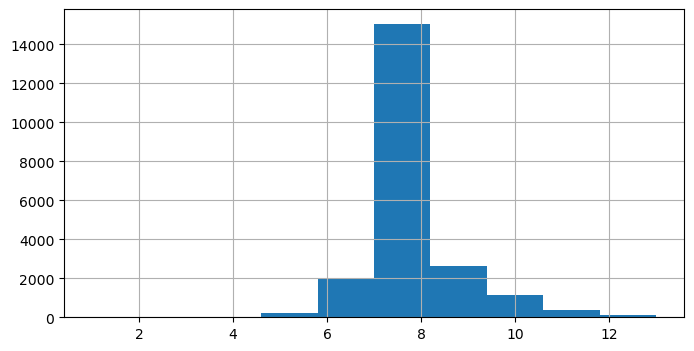

In [94]:
import pylab as P
plt.figure(figsize = (8,4))

df_house['grade'].hist()
P.show()

(-0.5, 11.5, 0.0, 5000000.0)

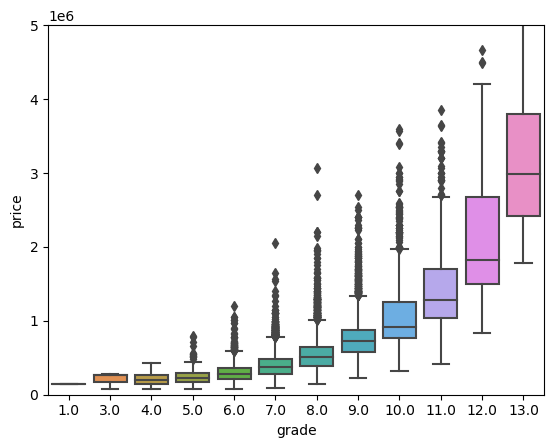

In [95]:
fig = sns.boxplot(x='grade', y='price', data=df_house)
fig.axis(ymin=0, ymax=5000000)